In [1]:
from loadingCGAN.novgan_trafic_input import Novgan_trafic_input
from load_data.load_data import load_data
from utils.config_novgan_trafic_input import *
from loadingCGAN.utils_cgan import creating_dico_index
from time import time
import numpy as np
from loadingCGAN.utils_cgan import save_time

Using TensorFlow backend.


In [49]:
########
# DATA #
########
x_train, _, y_train, _, x_balanced_train, _, x_test, y_test, colnames = load_data(place=place,
                                                                                  attack_mode=None,
                                                                                  attack=None,
                                                                                  nrows=10000000,
                                                                                  cv_size=cv_size,
                                                                                  log_transform=True,
                                                                                  shuffle=shuffle,
                                                                                  return_colnames=True)
x_train_bad = np.array([x for x, y in zip(x_train, y_train) if int(y) == 1])
x_train = np.array([x for x, y in zip(x_train, y_train) if int(y) == 0])

x_test_bad = np.array([x for x, y in zip(x_test, y_test) if int(y) == 1])
x_test = np.array([x for x, y in zip(x_test, y_test) if int(y) == 0])


if balanced_train_size is not None:
    x_balanced_train = x_balanced_train[:balanced_train_size]

data_dim = x_train.shape[1]
dico_index = creating_dico_index(colnames=colnames)

/home/peseux/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/peseux/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Train data shape is (125973, 122)
Test data shape is (125973, 122)

  
 
 
  
 
 
Train data shape is (117260, 122)

  
 
 
  
 
 
x_train overview
   0         1         2    3    4    5    6    7    8    9    ...  112  113  \
0 -1.0 -0.636153 -0.534103 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0   
1 -1.0 -0.494603 -0.061866 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0   
2 -1.0 -1.000000 -1.000000 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0   
3 -1.0 -0.485292 -0.080747 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0   
4 -1.0 -0.720181 -1.000000 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -1.0 -1.0   

   114  115  116  117  118  119  120  121  
0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
1 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
2 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
3 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  
4 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  

[5 rows x 122 columns]

  
 
 
  
 
 
y_train overview
     0
0  0.0
1  0.0
2  1.0
3  0.0
4  1.0

  
 
 
 

In [3]:
##########
# NovGan #
##########
novgan_trafic_input = Novgan_trafic_input(data_dim=data_dim, activation=activation, verbose=True,
                                          noise_dim=noise_dim,
                                          leaky_relu=leaky_relu, offset=offset, alpha=alpha, dropout=dropout,
                                          dico_index=dico_index,
                                          noise="normal",
                                          smooth_one=smooth_one,
                                          smooth_zero=smooth_zero, batch_size=batch_size)

Instructions for updating:
Colocations handled automatically by placer.
CHOSEN OPTIMIZER IS ADAM
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

 
 Generator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               32256     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________________________________

In [4]:
############
# Training #
############
start = time()
learned = novgan_trafic_input.train(x_train=x_train, epochs=epochs,
                                    x_train_bad=x_train_bad,
                                    print_recap=True)
end = time()
duration = end - start
save_time(duration=duration, location="tmp/", title=title)

novgan_trafic_input.hurting(x=x_test, title="benin test", print_mode=True)
novgan_trafic_input.hurting(x=x_test_bad, title="malveillant test", print_mode=True)

# Epoch 0/100
Instructions for updating:
Use tf.cast instead.


/home/peseux/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


# Epoch 1/100
# Epoch 2/100
# Epoch 3/100
# Epoch 4/100
# Epoch 5/100
# Epoch 6/100


KeyboardInterrupt: 

In [5]:
generated = novgan_trafic_input.generate(number=10000, x_bad=x_test[:1000])

In [6]:
from __future__ import print_function, division
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import numpy as np
from keras.initializers import glorot_uniform



leaky_relu = .1
auto_encoder  = Sequential()
auto_encoder.add(Dense(64,
                    input_dim=data_dim,
                    kernel_initializer=glorot_uniform()))
auto_encoder.add(LeakyReLU(leaky_relu))
auto_encoder.add(Dense(32))
auto_encoder.add(LeakyReLU(leaky_relu))
auto_encoder.add(BatchNormalization())
auto_encoder.add(Dense(data_dim))
auto_encoder.add(LeakyReLU(leaky_relu))
auto_encoder.add(Dense(data_dim))
auto_encoder.add(BatchNormalization())
auto_encoder.compile(loss="mse",optimizer=Adam(0.0002, 0.5))
auto_encoder.fit(x_train, x_train, epochs=10, batch_size=128)
x_ae_test = auto_encoder.predict(x_test_bad)

Epoch 1/10
53834/53834 [==============================] - 2s 29us/step - loss: 1.3401
Epoch 2/10
53834/53834 [==============================] - 1s 19us/step - loss: 0.7895
Epoch 3/10
53834/53834 [==============================] - 1s 19us/step - loss: 0.6099
Epoch 4/10
53834/53834 [==============================] - 1s 18us/step - loss: 0.4880
Epoch 5/10
53834/53834 [==============================] - 1s 18us/step - loss: 0.3912
Epoch 6/10
53834/53834 [==============================] - 1s 18us/step - loss: 0.3101
Epoch 7/10
53834/53834 [==============================] - 1s 18us/step - loss: 0.2421
Epoch 8/10
53834/53834 [==============================] - 1s 18us/step - loss: 0.1856
Epoch 9/10
53834/53834 [==============================] - 1s 17us/step - loss: 0.1392
Epoch 10/10
53834/53834 [==============================] - 1s 17us/step - loss: 0.1018


In [7]:
x_train.shape

(53834, 116)

In [9]:
x10 = auto_encoder.predict(x_test[:100].reshape(((100,116))))
x1 = auto_encoder.predict(x_test[0].reshape(((1,116))))

In [10]:
np.max(x1[0] - x10[0])

1.1920929e-07

In [11]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)  

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_pca = pca.transform(x_train)
x_pca_gen = pca.transform(generated)
x_pca_ae = pca.transform(x_train_bad)

In [13]:
from matplotlib import pyplot as plt

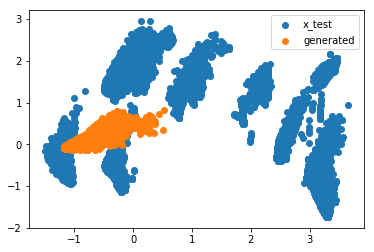

In [14]:
plt.scatter(x_pca[:,0].tolist(),x_pca[:,1].tolist(), label="x_test")
plt.scatter(x_pca_gen[:,0].tolist(),x_pca_gen[:,1].tolist(), label="generated")
# plt.scatter(x_pca_ae[:,0].tolist(),x_pca_ae[:,1].tolist(), label="auto_encoded")
plt.legend()
plt.show()
plt.close()

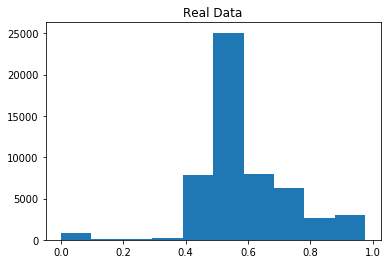

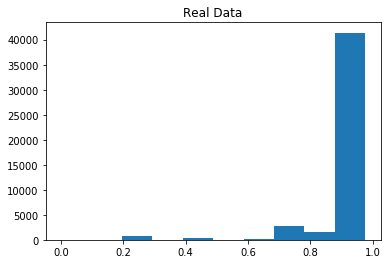

In [63]:
############
# Plotting #
############
benin_data = novgan_trafic_input.hurting(x=x_train, print_mode=True,title="Real Data")
malicious_data = novgan_trafic_input.hurting(x=x_train_bad, print_mode=True,title="Real Data")


/home/peseux/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


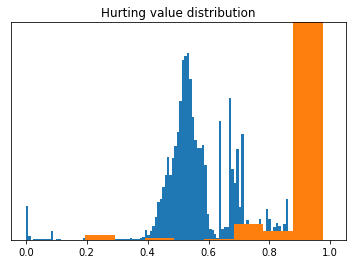

In [64]:
plt.hist(benin_data, normed=True, bins=120, label="benin")
plt.hist(malicious_data, normed=True, bins=10, label="malicious")
plt.xlim(-0.05,1.05)
plt.yticks([])
plt.ylim(0, 8)
plt.title("Hurting value distribution")
plt.savefig("hurting-distrib.png")
plt.show()
plt.close()

In [65]:
def eigth_threshold(x):
    if x>.8:
        return 1.0
    else:
        return 0.

In [66]:
benin_data = novgan_trafic_input.hurting(x=x_test, print_mode=False,title="Real Data")
malicious_data = novgan_trafic_input.hurting(x=x_test_bad, print_mode=False,title="Real Data")

In [70]:
y_pred= [eigth_threshold(b) for b in benin_data] + [eigth_threshold(m) for m in malicious_data] 

In [71]:
y_true = [.0 for _ in benin_data] + [1.0 for _ in malicious_data]

In [72]:
from sklearn.metrics import confusion_matrix as confusion_matrix, precision_score,f1_score, recall_score, accuracy_score


In [75]:
recall_score(y_pred=y_pred, y_true=y_true)

0.912468019785093

In [76]:
precision_score(y_pred=y_pred, y_true=y_true)

0.8942116435723001

In [77]:
f1_score(y_pred=y_pred, y_true=y_true)

0.9032475919531983

In [78]:
accuracy_score(y_pred=y_pred, y_true=y_true)

0.9090201868654394